# Unsupervised Image Clustering & Classification with Deep Learning

# Data Preparation steps:-

### Importing libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Model
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import random
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Loading the Fashion MNIST dataset 

In [ ]:
x_train = pd.read_csv('/content/x_train.csv')
y_train=pd.read_csv('/content/y_train.csv')
x_test = pd.read_csv('/content/x_test.csv')
y_test = pd.read_csv('/content/y_test.csv')

### Normalize the pixel values to the range [0, 1]
We know that the pixel values for each image in the dataset are unsigned integers in the range between black and white, or 0 and 255. We converted the data type from unsigned integers to floats, then dividing the pixel values by the maximum value.

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

### Reshape the input data to have a single channe

In [ ]:
x_train = x_train.values.reshape( -1,28, 28,1)
x_test = x_test.values.reshape( -1,28, 28,1)

### Visualizing the dataset entity

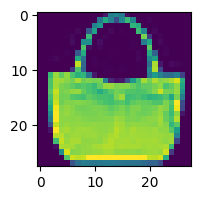

[3]


In [ ]:
plt.figure(figsize=(2,2))

idx=100
grid_data = x_train[idx]
plt.imshow(grid_data,interpolation="none")
plt.show()
print(y_train.iloc[idx].to_numpy())

# Classification with Convolutional Neural Networks
The convolutional neural network (CNN) is a class of deep learning neural networks. CNNs represent a huge breakthrough in image recognition.
In this assignment, we develop a convolutional neural network for clothing classification using the FashionMNIST dataset.

## **Q1** Default Network

#### Defining the Default CNN Model with the followin Architecture:- 
* We will develop a CNN model with input features x and two convolutional layers with 32, 3x3 filters, stride 1 and padding 1x1, a max pooling layer.
* output layer: one fully connected layer with five output values and a softmax layer to transform the outputs into a multi-class probability distribution for classification
* activation functions: internal layers all use ReLU. 
* activation and optimizer : Stochastic Gradient Descent.


In [ ]:
# Define the CNN model
model_default = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same',strides=(1,1) ,activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), padding='same', strides=(1,1) , activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(5, activation='softmax'),
])

In [ ]:
start1 = time.time()
pred_X = testmodel2.predict(x_test)
pred_X
end1 =time.time()
print("Total testing time  is {:0.2f} minutes".format ((end1 - start1)/60.0))
loss, accuracy = testmodel2.evaluate(x_test, y_test)

##### Default model summary is as follows:-

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 5)                 31365     
                                                                 
Total params: 40,933
Trainable params: 40,933
Non-trainable params: 0
____________________________________________________

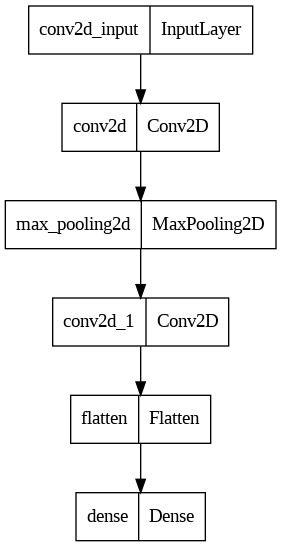

In [ ]:
model_default.summary()
plot_model(model_default)

We will now compile the model using the keras function model.compile() with the optimizer as Stochastic Gradient Descent (sgd) and a loss function as 'sparse_categorical_crossentropy' since this is a multiclass classification problem with the output label assigned values as integers from 0-4. 

In [ ]:
# Compile the model
model_default.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Training the Model:- 
We will now train the model using the model.fit() method by passing the x_train and y_train dataset and repeatedly iterating over the entire training dataset for a given number of epochs ie; 15 in our case. The returned history_default object holds a record of the loss values and metric values during training. 

In [ ]:
# Train the model on the training data
%%time
history_default = model_default.fit(x_train, y_train, epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 15s 4ms/step - loss: 0.6175 - accuracy: 0.7600 - val_loss: 0.4636 - val_accuracy: 0.8317
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4194 - accuracy: 0.8467 - val_loss: 0.3821 - val_accuracy: 0.8634
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3706 - accuracy: 0.8672 - val_loss: 0.3496 - val_accuracy: 0.8753
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3395 - accuracy: 0.8803 - val_loss: 0.3261 - val_accuracy: 0.8835
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3166 - accuracy: 0.8875 - val_loss: 0.3129 - val_accuracy: 0.8875
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2989 - accuracy: 0.8932 - val_loss: 0.2923 - val_accuracy: 0.8949
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2846 - accuracy: 0.8985 - val_loss: 0.3103 - val_accuracy

#### Model Evaluation:-
We evaluated the model for the test dataset using the model.evaluate() function.The evaluate function generates the test loss and test accuracy of the model. 

In [ ]:
%%time
# Evaluate the model on the test data
test_loss_default, test_acc_default= model_default.evaluate(x_test, y_test)
print('Test accuracy of the default model: {:.2f}'.format(test_acc_default*100),'%')
print('Test loss for the default model: {:.2f}'.format(test_loss_default*100),'%')

313/313 [==============================] - 1s 2ms/step - loss: 0.2691 - accuracy: 0.9034
Test accuracy of the default model: 90.34 %
Test loss for the default model: 26.91 %
CPU times: user 1.13 s, sys: 121 ms, total: 1.25 s
Wall time: 1.5 s




---


## **Q2** Classify the data using any other architecture that you want to try. 

To find the best CNN architecture for classifying fashionMNIST dataset, we will create different experiemntal models to find the most accurate and efficient CNN architecture which will perform better than the default network.

We will be creating a CNN design as this architecture performs better than an entirely fully connected feed forward neural network for image classification.CNN design involves feature extraction through alternating convolution and subsampling layers, followed by classification with dense and softmax layers. 

We will experiment by changing the number of convolutional, dense and softmax layers and see how these hyperparameters affect the accuracy of the model. 

### **Model 1.** 
**Architecture**:

* 3 layers with 128 maps in the first convolutional layer ,64  maps in the second convolutional layer and 32 maps in the third layer with MaxPooling after each layer. 
* Keeping padding same and strides=1 in all the three layers. 
* One dense layer as input layer with 128 units (more the number of units , dense layer perform better).
* output layer: one fully connected layer with five output values and a softmax layer.
* optimizer and activation: adam & **ReLU** 
* Epochs: 15

In [ ]:
#Define the model
model_1= keras.Sequential([
    keras.layers.Conv2D(128, (3,3), padding='same', strides=(1,1), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3),padding='same', strides=(1,1), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(32,(3,3), padding='same',strides=(1,1),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(5,activation='softmax'),
   ])
#Compile the model 
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model 1 summary and layer diagram:-

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 64)        73792     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 7, 7, 32)          18464     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 3, 3, 32)        

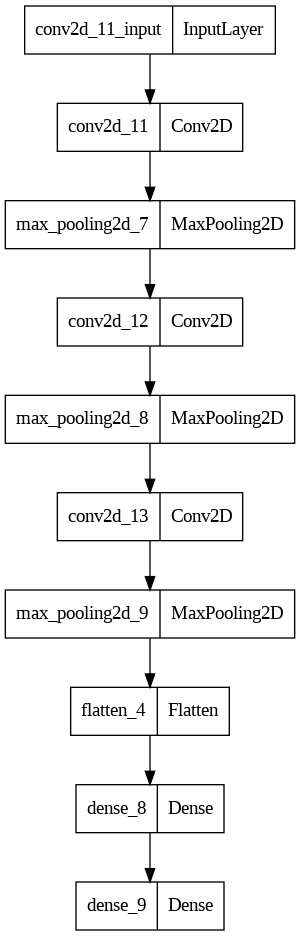

In [ ]:
#Model Summary
model_1.summary()
#Model diagram
plot_model(model_1)

Training the model and storing the results in the history_1 

In [ ]:
%%time
## Train the model on the training data
history_1 = model_1.fit(x_train, y_train, epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 10s 5ms/step - loss: 0.3658 - accuracy: 0.8607 - val_loss: 0.2898 - val_accuracy: 0.8932
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2258 - accuracy: 0.9181 - val_loss: 0.2231 - val_accuracy: 0.9193
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1886 - accuracy: 0.9324 - val_loss: 0.1967 - val_accuracy: 0.9308
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1652 - accuracy: 0.9412 - val_loss: 0.1970 - val_accuracy: 0.9296
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1470 - accuracy: 0.9470 - val_loss: 0.1986 - val_accuracy: 0.9302
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1316 - accuracy: 0.9528 - val_loss: 0.2233 - val_accuracy: 0.9182
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1161 - accuracy: 0.9579 - val_loss: 0.1878 - val_accuracy

Evaluating the performance of CNN Model 1:- 

In [ ]:
%%time
# Evaluate the model on the test data
test_loss1, test_acc1 = model_1.evaluate(x_test, y_test)
print('Test accuracy for Model 1 is {:.2f}'.format(test_acc1*100),'%')
print('Test loss for Model 1 is {:.2f}'.format(test_loss1*100),'%')

313/313 [==============================] - 2s 4ms/step - loss: 0.2207 - accuracy: 0.9324
Test accuracy for Model 1 is 93.24 %
Test loss for Model 1 is 22.07 %
CPU times: user 1.4 s, sys: 134 ms, total: 1.53 s
Wall time: 1.75 s


In [ ]:
# Evaluate the model on the test data
test_loss1, test_acc1 = model_1.evaluate(x_test, y_test)
print('Test accuracy for Model 1 is {:.2f}'.format(test_acc1*100),'%')
print('Test loss for Model 1 is {:.2f}'.format(test_loss1*100),'%')

313/313 [==============================] - 1s 3ms/step - loss: 0.2018 - accuracy: 0.9356
Test accuracy for Model 1 is 93.56 %
Test loss for Model 1 is 20.18 %


#### **Results of Model 1:**

---

We can see that by adding 3 convolutional layers with max pooling layer after each convolutional layer increases the accuracy of the model to 93.56% as compared to the default network. 

This is because adding more layers can allow the model to learn more complex features from the input data, leading to improved feature extraction.Additionally, adding max pooling layer after each convolutional layer improves the model's ability to generalize new data by reducing the spatial size of the output feature maps while retaining the most important information.It can also be observed that Adam optimizer worked better than SGD optimizer. 

### **Model 2.** 
**Architecture**:
Keeping the architecture design same as model 1 and changing the hyper parameter 'padding' as valid for Second and third layers. 

In [ ]:
#Define the model
model_2= keras.Sequential([
    keras.layers.Conv2D(128, (3,3), padding='same', strides=(1,1), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3),padding='valid', activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(32,(3,3), padding='valid',activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(5,activation='softmax'),
   ])
#Compile the model 
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model 2 Summary and layer diagram: 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 64)        73792     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 2, 2, 32)        

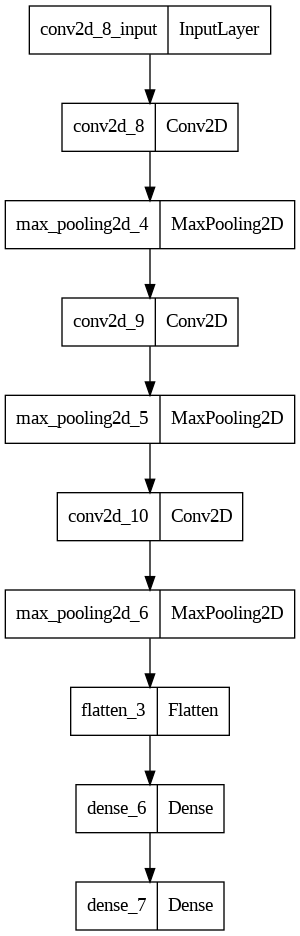

In [ ]:
#Model Summary
model_2.summary()
plot_model(model_2)

Training the model and storing the results in the history_2

In [ ]:
%%time
## Train the model on the training data
history_2 = model_2.fit(x_train, y_train, epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 10s 5ms/step - loss: 0.3778 - accuracy: 0.8569 - val_loss: 0.2590 - val_accuracy: 0.9043
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2331 - accuracy: 0.9163 - val_loss: 0.2069 - val_accuracy: 0.9252
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1965 - accuracy: 0.9290 - val_loss: 0.2060 - val_accuracy: 0.9234
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1751 - accuracy: 0.9358 - val_loss: 0.1831 - val_accuracy: 0.9320
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1574 - accuracy: 0.9433 - val_loss: 0.1949 - val_accuracy: 0.9277
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1444 - accuracy: 0.9465 - val_loss: 0.1805 - val_accuracy: 0.9368
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1315 - accuracy: 0.9526 - val_loss: 0.1896 - val_accuracy

Evaluating the performance of CNN Model 2:- 

In [ ]:
%%time
# Evaluate the model on the test data
test_loss2, test_acc2 = model_2.evaluate(x_test, y_test)
print('Test accuracy for Model 2 is {:.2f}'.format(test_acc2*100),'%')
print('Test loss for Model 2 is {:.2f}'.format(test_loss2*100),'%')

313/313 [==============================] - 1s 3ms/step - loss: 0.2164 - accuracy: 0.9287
Test accuracy for Model 2 is 92.87 %
Test loss for Model 2 is 21.64 %
CPU times: user 1.17 s, sys: 119 ms, total: 1.28 s
Wall time: 1.49 s


#### **Results of Model 2:**

---

We can see that changing just the padding hyperparameter did not much change the test accuracy of the model. But, it is observed that the test loss for the Model 2 decreased as compared to model 1 and default model. 
This might be because without padding, the model has fewer parameters to learn which can lead to less overfitting and smaller output feature maps can lead to less memory usage.

### **Model 3.** 
**Architecture**:
In this model, we will add a dropout layers at 20% rate,after the dense input layer with 128 units. The remaining architecture is same as Model 2. 
We added a dropout layer as a regularization technique, that we can use to reduce the model capacity so that our model can achieve lower generalization error.

In [ ]:
#Define the model
model_3= keras.Sequential([
    keras.layers.Conv2D(128, (3,3), padding='same', strides=(1,1), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3),padding='valid', activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(32,(3,3), padding='valid',activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5,activation='softmax'),
   ])
#Compile the model 
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model 3 Summary and layer diagram: 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 32)        

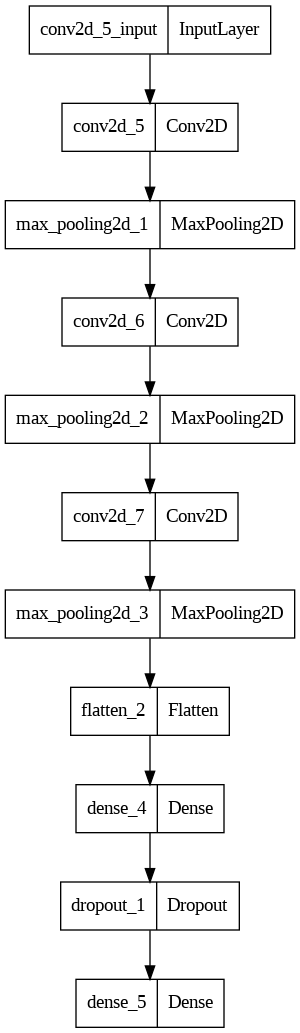

In [ ]:
#Model Summary
model_3.summary()
plot_model(model_3)

Training the model and storing the results in the history_3

In [ ]:
%%time
## Train the model on the training data
history_3 = model_3.fit(x_train, y_train, epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 10s 5ms/step - loss: 0.4145 - accuracy: 0.8396 - val_loss: 0.2876 - val_accuracy: 0.8917
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2483 - accuracy: 0.9107 - val_loss: 0.2560 - val_accuracy: 0.9068
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2094 - accuracy: 0.9256 - val_loss: 0.2008 - val_accuracy: 0.9293
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1848 - accuracy: 0.9339 - val_loss: 0.2095 - val_accuracy: 0.9243
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1645 - accuracy: 0.9406 - val_loss: 0.1917 - val_accuracy: 0.9338
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1529 - accuracy: 0.9453 - val_loss: 0.1856 - val_accuracy: 0.9344
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1416 - accuracy: 0.9484 - val_loss: 0.1811 - val_accuracy

Evaluating the performance of CNN Model 3:- 

In [ ]:
%%time
# Evaluate the model on the test data
test_loss3, test_acc3 = model_3.evaluate(x_test, y_test)
print('Test accuracy for Model 3 is {:.2f}'.format(test_acc3*100),'%')
print('Test loss for Model 3 is {:.2f}'.format(test_loss3*100),'%')

313/313 [==============================] - 3s 7ms/step - loss: 0.1913 - accuracy: 0.9378
Test accuracy for Model 3 is 93.78 %
Test loss for Model 3 is 19.13 %
CPU times: user 1.52 s, sys: 99.3 ms, total: 1.62 s
Wall time: 3.41 s


#### **Results of Model 3:**

---
We can observe that adding a dropout layer, ideally should improve the accuracy of the model and we can see that there is indeed an increase in the accuracy.Dropout randomly drops out some of the neurons in the network during training, forcing the remaining neurons to take on more responsibility and preventing the model from relying too heavily on any particular feature.This prevents overfitting of the model thereby, increasing the accuracy. 
 

### **Model 4.** 
**Architecture**:
In this model, we will place the dropout layer before flatten layer. Addditonally, we will add hidden layers to our model with 128 units. Also, we will see the effect of adding Batch normalization after each layer. 
Optimizer : adam and Activation: ReLU


In [ ]:
#Define the model
model_4= keras.Sequential([
    keras.layers.Conv2D(128, (3,3), padding='same', strides=(1,1), activation='relu', input_shape=(28,28,1)),
    keras.layers.BatchNormalization(),   
    keras.layers.Conv2D(64, (3,3),padding='valid', activation='relu'),
    keras.layers.BatchNormalization(),  
    keras.layers.Conv2D(32,(3,3), padding='valid',activation='relu'),
    keras.layers.BatchNormalization(),   
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    # keras.layers.BatchNormalization(),
    keras.layers.Dense(5,activation='softmax'),
   ])
#Compile the model 
model_4.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 batch_normalization_2 (Batc  (None, 24, 24, 32)      

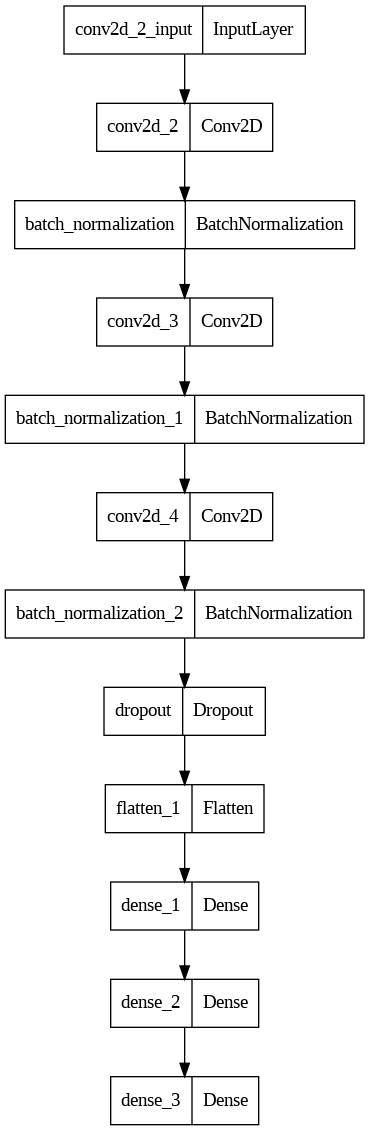

In [ ]:
model_4.summary()
plot_model(model_4)

In [ ]:
%%time
## Train the model on the training data
history_4 = model_4.fit(x_train, y_train, epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 19s 10ms/step - loss: 0.3456 - accuracy: 0.8787 - val_loss: 0.2465 - val_accuracy: 0.9157
Epoch 2/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2003 - accuracy: 0.9282 - val_loss: 0.2061 - val_accuracy: 0.9275
Epoch 3/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1528 - accuracy: 0.9450 - val_loss: 0.1967 - val_accuracy: 0.9322
Epoch 4/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1208 - accuracy: 0.9562 - val_loss: 0.2103 - val_accuracy: 0.9277
Epoch 5/10
1500/1500 [==============================] - 14s 10ms/step - loss: 0.0992 - accuracy: 0.9647 - val_loss: 0.1927 - val_accuracy: 0.9351
Epoch 6/10
1500/1500 [==============================] - 14s 10ms/step - loss: 0.0750 - accuracy: 0.9740 - val_loss: 0.2276 - val_accuracy: 0.9367
Epoch 7/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0623 - accuracy: 0.9778 - val_loss: 0.2225 - v

In [ ]:
%%time
# Evaluate the model on the test data
test_loss4, test_acc4 = model_4.evaluate(x_test, y_test)
print('Test accuracy of Model 4 is {:.2f}'.format(test_acc4*100),'%')
print('Test loss of Model 4 is {:.2f}'.format(test_loss4*100),'%')

313/313 [==============================] - 2s 4ms/step - loss: 0.3012 - accuracy: 0.9384
Test accuracy of Model 4 is 93.84 %
Test loss of Model 4 is 30.12 %
CPU times: user 1.54 s, sys: 104 ms, total: 1.64 s
Wall time: 2.92 s


#### **Results of Model 4:**

---
We can observe tha the best accuracy is achieved with Model 4.
The accuracy is improved by increasing the hidden layers as it increased its capacity to learn complex patterns and relationships in the data.
Also, applying Batch normalization technique after each convolutional layer improved the training of neural networks by normalizing the inputs to each layer of the network. 


Therefore, the best CNN architecture that we will take forward is **Model 4** with the following architecture. 

In [ ]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 batch_normalization_2 (Batc  (None, 24, 24, 32)      

In [ ]:
# plot for classification accuracy for training data
# plt.plot(history_default.history['accuracy'])
# plt.plot(history_default.history['val_accuracy'])
# plt.ylim(0.5,1)
# plt.title('Model Accuracy for default network')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train','Validation'],loc='upper left')
# plt.show()
# plot for classification accuracy for validation data
# plot for training loss for training data
# plot for training loss for validation data


---

## **Q3** Results Analysis

### Runtime performance for training and testing






RUNTIME   | DEFAULT MODEL | MODEL 1| MODEL 2 | MODEL 3 | MODEL 4|
----------|---------------|--------|---------|---------|--------|
Train time| 1 min 22 s.   |1 min 23 s| 1 min 23 s| 1 min 23 s| 3 min 23 s
Test Time | 1.5s.         | 1.75s| 1.49s | 3.41s | 2.92s|

It can be observed that more the complex model, more are the number of parameters to be trained and hence, a large training time required. We can observe from the above analysis that the time taken by model 4 is the highest. The default model on the other hand has the lowest runtime as it is a simple model with the least number of training parameters. 
Runtime can indirectly affect the performance of the model. If the runtime is too high, it can result in overfitting the training data thereby, reducing accuracy or increasing losses. 

### Comparison of the different hyper-parameters or designs you tried

HYPER PARAMETRERS      | DEFAULT MODEL | MODEL 1| MODEL 2 | MODEL 3 | MODEL 4|
-----------------------|---------------|--------|---------|---------|--------|
#Conv 2D Layer.        |     2.        |  3.    |   3.    |    3.   |  3.    |
#max pooling 2D layer  |     1.        |  3.    |   3.    |    3.   |  0.    |
Batch Normalization    |    No.        |  No    |   No.   |    No.  |  Yes.  |
padding                |   same.       | same. | valid.  |.valid.  | valid  |
Activation layer       |   relu.       | relu.  |relu.   | relu.   | relu.  |
Dense layers           |   1(output).  | 2.    | 2.     |  2.    | 3.    |
Dropout Layers.        |    0.         |  0.    | 0.     | 1(20%) | 1(20%) |
Optimizer              |    sgd        | adam.  | adam.   | adam.   |  adam. |
Loss function          |    scc        |  scc.  | scc.    | scc.   |  scc.  |
epochs                 |    10.        | 10.    | 10.     |  10.    | 10.   |
Accuracy               | **90.34%**    | **93.24%** | **92.87%**|**93.78%** | **93.84%**|



The above table shows the comparasion of different hyperparameters tried to find the model with the highest accuracy. It is clear that the default model has an sgd optimizer and the number of convolutional layers are less compared to other models, which justifies its poor accuracy when compared to other models. 
As we keep experimenting with the hyperparameters by adding dropout layers, more hidden layers and changing the optimizer, we see the change in how the model learns patterns in data which affects the accuracy and inturn, performance of the model. 

Note: In the previous question, we have elaborated the results and effects of these parameters on model performance. 

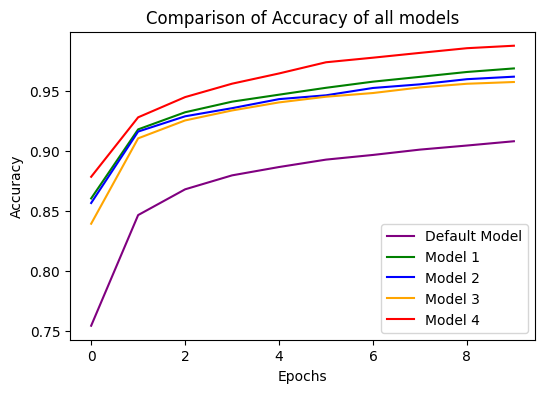

In [ ]:
acc_default=history_default.history['accuracy']
acc1=history_1.history['accuracy']
acc2=history_2.history['accuracy']
acc3=history_3.history['accuracy']
acc4=history_4.history['accuracy']
plt.figure(figsize=(6,4))
plt.plot(acc_default, color='purple', label= 'Default Model')
plt.plot(acc1, color='g', label='Model 1')
plt.plot(acc2, color='blue', label='Model 2')
plt.plot(acc3, color='orange', label='Model 3')
plt.plot(acc4, color='red', label='Model 4')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy of all models')
plt.legend()
plt.show()

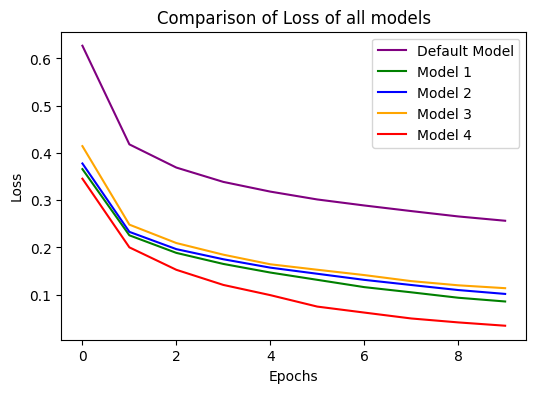

In [ ]:
#Loss for all the models
loss_default=history_default.history['loss']
loss1=history_1.history['loss']
loss2=history_2.history['loss']
loss3=history_3.history['loss']
loss4=history_4.history['loss']
plt.figure(figsize=(6,4))
plt.plot(loss_default, color='purple', label= 'Default Model')
plt.plot(loss1, color='g', label='Model 1')
plt.plot(loss2, color='blue', label='Model 2')
plt.plot(loss3, color='orange', label='Model 3')
plt.plot(loss4, color='red', label='Model 4')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparison of Loss of all models')
plt.legend()
plt.show()

### Produce a plot showing the training loss vs. training epoch for the training data and the validation data on the same plot. Do this for each model.

**Training loss:** The training loss is a measure of how well a model fits the training data during the training process.

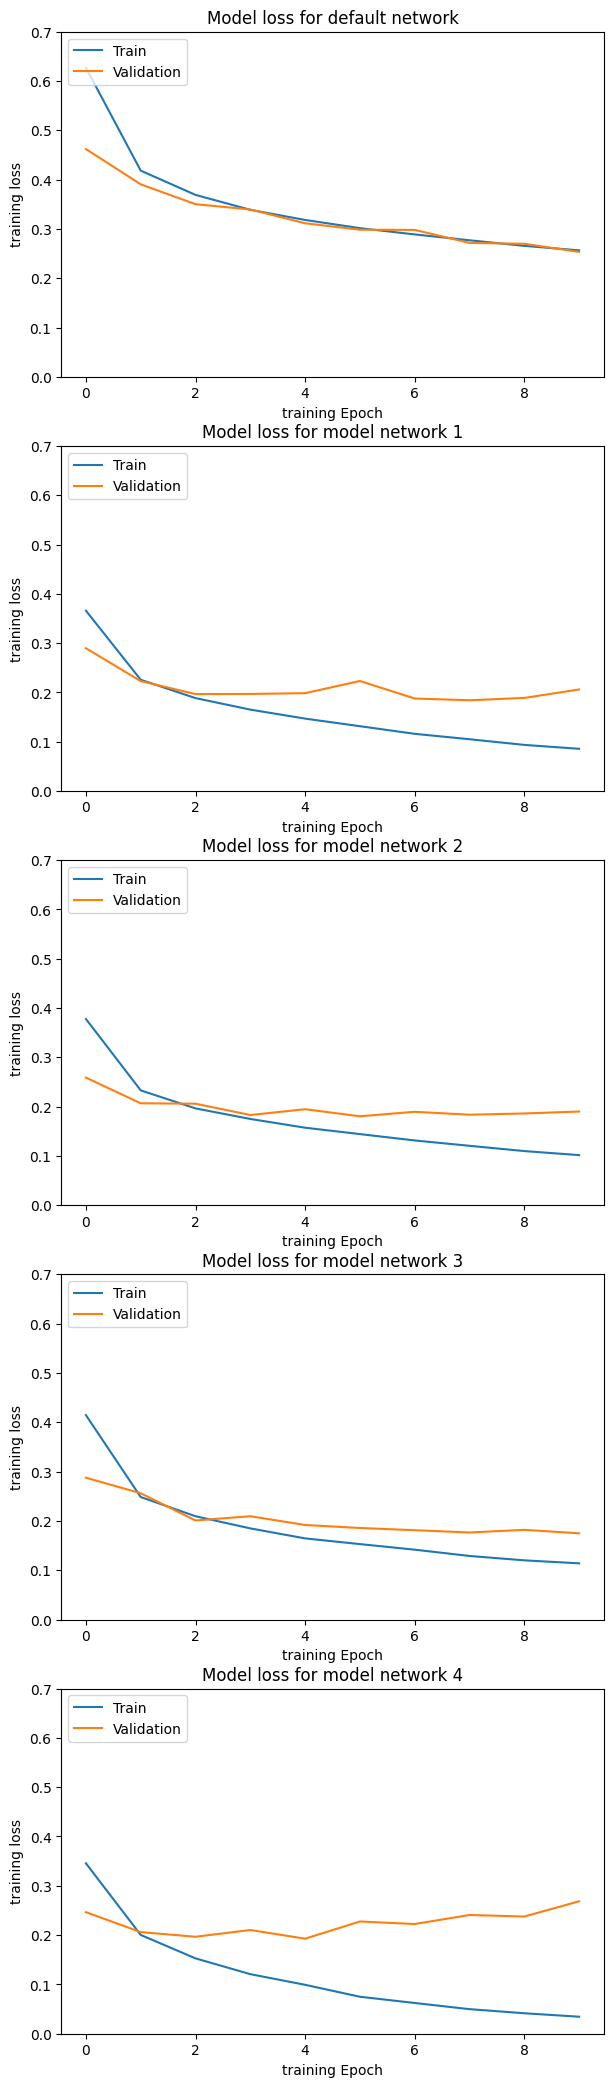

In [ ]:
histories=[history_default,history_1,history_2, history_3, history_4]
fig, axs = plt.subplots(5, 1, figsize=(7, 26))
for i in range (0,5):
    axs[i].plot(histories[i].history['loss'])
    axs[i].plot(histories[i].history['val_loss'])
    axs[i].set_ylim(0, 0.7)
    if (i==0):
      axs[i].set_title('Model loss for default network' )
    else:
      axs[i].set_title('Model loss for model network ' +str(i))
     
    axs[i].set_ylabel('training loss')
    axs[i].set_xlabel('training Epoch')
    axs[i].legend(['Train','Validation'],loc='upper left')


From the above plots, we can observe that the validation loss decreases with the increase in epochs. This is because the model's parameters are adjusted based on gradients computed from the loss function. As the training progresses, the model becomes better at predicting the correct output for the training data, and the training loss decreases. 

It is observed that training loss for the training and validation set is approximately same for the default network. This is not the case for our own designed network. 
We can see that in Model_4, the difference between the loss for the training and validation set is increased as the number of epochs increased. This might be because the model is overfitting to the training data and performs poorly with the new data thereby, resulting a variation in the values. 

### Produce another plot showing classification accuracy vs. training epoch for the training data and the validation data on the same plot. Do this for each model.

**Classification accuracy:** 
Classification accuracy is a metric used to evaluate the performance of a machine learning model for classification tasks.

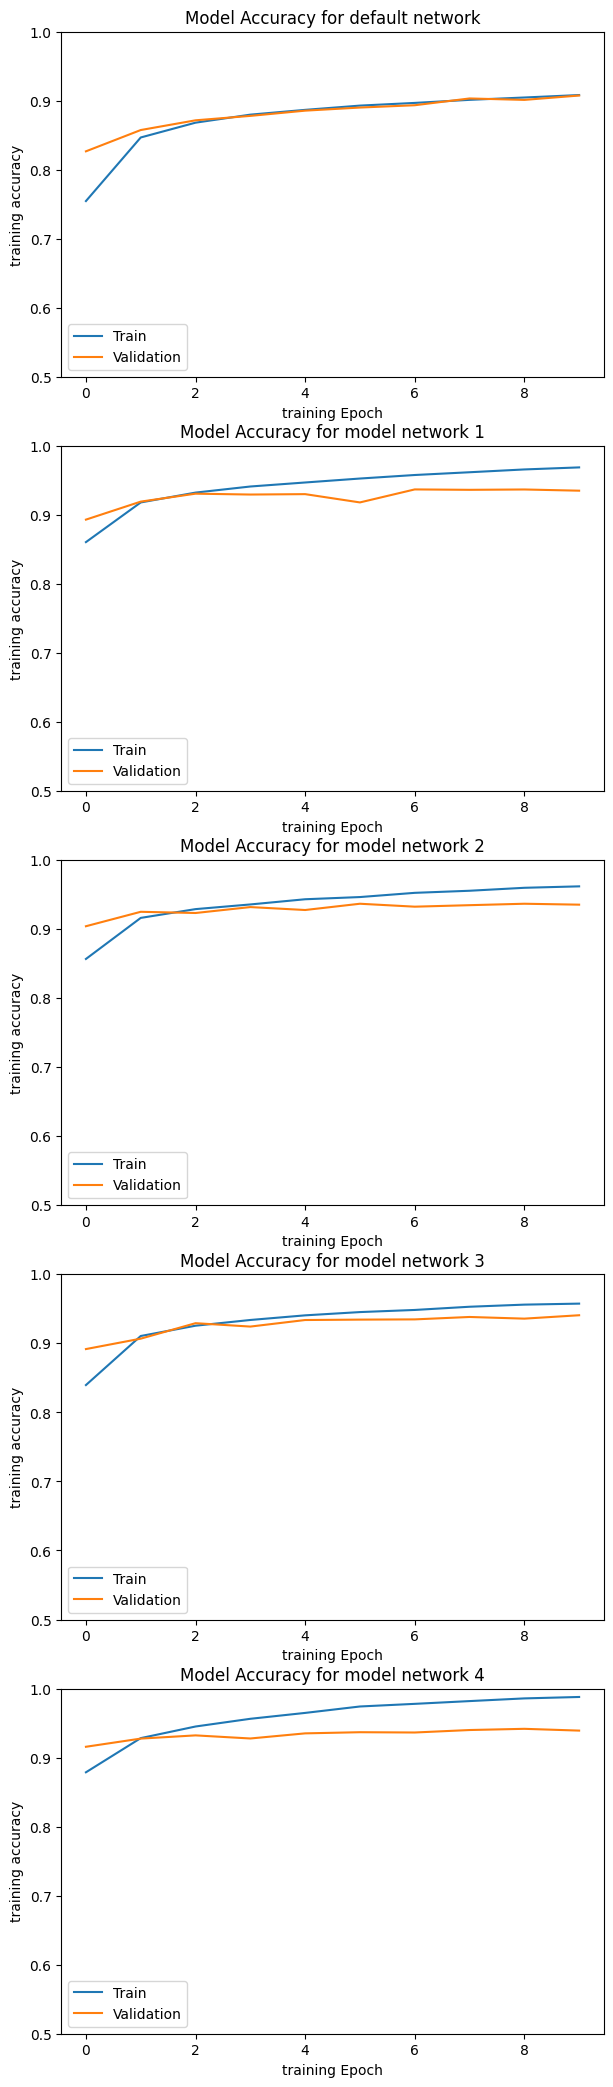

In [ ]:
histories=[history_default,history_1,history_2, history_3, history_4]
fig, axs = plt.subplots(5, 1, figsize=(7, 26))
for i in range (0,5):
    axs[i].plot(histories[i].history['accuracy'])
    axs[i].plot(histories[i].history['val_accuracy'])
    axs[i].set_ylim(0.5, 1)
    if (i==0):
      axs[i].set_title('Model Accuracy for default network' )
    else:
      axs[i].set_title('Model Accuracy for model network ' +str(i))
     
    axs[i].set_ylabel('training accuracy')
    axs[i].set_xlabel('training Epoch')
    axs[i].legend(['Train','Validation'],loc='lower left')

From the above plots, it is clear that the classification accuracy increases with the number of epochs. 
As the training progresses and the number of epochs increases, the model is gradually improved to better capture the patterns in the training data.
This improvement in the model's performance can result in an increase in classification accuracy over time. As the model is trained on more and more epochs, it becomes more adept at recognizing the patterns in the training data, and is able to make more accurate predictions on the training set.

Additionally, it is noticed from the above graphs that the classification accuracy for training and validation set is approximately same for all the epochs. On the other hand,for other models, the validation accuracy is slightly lower than the training accuracy. This is because the model has been trained on the training data and may have overfit to it.

We can also see that upto 5-6 epochs the accuracy for both the datasets is approximately same and tends to increase thereafter. 

### **Comparison of Accuracy and loss for Different Models**
|Model   | Accuracy | Loss  |
---------|----------|-------|
|Default | 90.34%| 26.91%|
|Model 1 | 93.24%| 22.07%|
|Model 2 | 92.87%| 21.64%|
|Model 3 | 93.78%| 19.13%|
|Model 4 | 93.84%| 30.12%|

From the above analysis, it is clear that the Model4 has the highest accuracy with complex parameters. But, we can observe that this model has the highest loss as well. This might be because it is able to correctly classify most of the examples but is making mistakes on a few examples that are particularly hard to classify. These outliers may have high error rates and contribute to a high overall loss, even if the model is performing well on the rest of the examples.
We can see that Model 3 has the lowest loss and a decent accuracy of 93.78% and can also be considered for future analysis. 


---

## **Q4** Using Your Own Encoding
In this part, we will consider our model 4 which has the best accuracy out of all other models. 

We obtain our simple intermediate model by taking all layers before the flatten layer of Model 4. We then passed the x_test dataset as an argument to this model and renamed it encoded. 


This is the simple intermediate model created out of Model 4

313/313 [==============================] - 1s 3ms/step


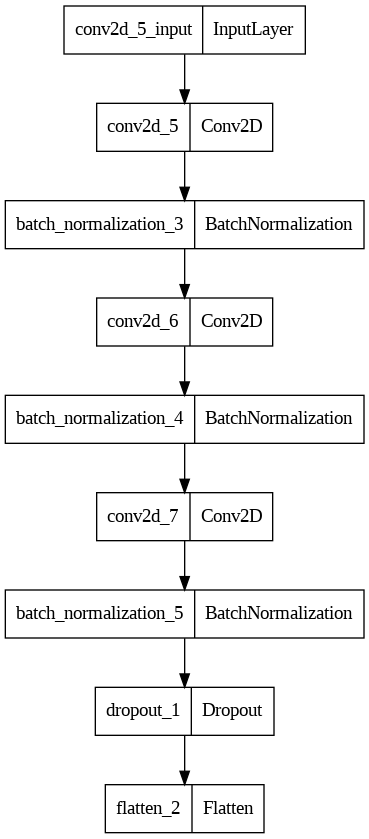

In [ ]:
get_3rd_layer_output = Model(model_4.input, model_4.layers[-4].output)
encoded=get_3rd_layer_output.predict(x_test)
plot_model(get_3rd_layer_output)

This is the encoded model. We will treat the elements of this encoding as features in a dataset for clustering and visualization.

In [ ]:
encoded

array([[-0.10122357, -0.07992441, -0.23033829, ..., -0.12175184,
        -0.09267996, -0.0517817 ],
       [-0.10122357, -0.07992441, -0.23033829, ..., -0.12175184,
         1.229917  ,  1.8631958 ],
       [-0.10122357, -0.07992441, -0.23033829, ..., -0.12175184,
        -0.09267996, -0.0517817 ],
       ...,
       [-0.10122357, -0.07992441, -0.23033829, ..., -0.12175184,
        -0.09267996, -0.0517817 ],
       [-0.10122357, -0.07992441, -0.23033829, ..., -0.12175184,
        -0.09267996, -0.0517817 ],
       [-0.10122357, -0.07992441, -0.23033829, ..., -0.12175184,
        -0.09267996, -0.0517817 ]], dtype=float32)

### Visualize your encoding with the first two components from PCA, the colour mapping could be the label values.
 ### PCA 
---
We have implemented PCA with two components and visualized the data in a raw format. 

In [ ]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca=pca.fit_transform(encoded)


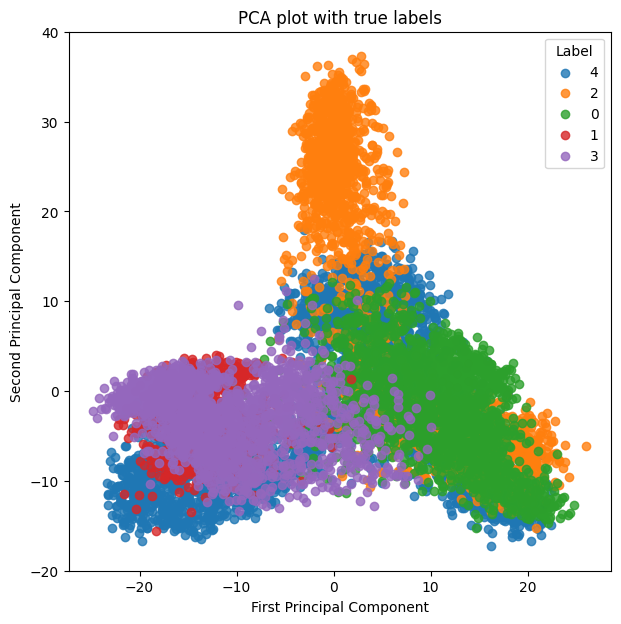

In [ ]:
# PCA plot
plt.figure(figsize=(7,7))

labels=y_test['0'].unique()
colors=sns.color_palette(None, len(labels))
for color, label in zip(colors,labels):
  plt.scatter(pca[label==y_test['0'],0],pca[label==y_test['0'],1],color=color, alpha=0.8, lw=1, label=label)
  plt.legend(title='Label', loc='upper right',scatterpoints=1)

plt.title('PCA plot with true labels')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

It can be observed that the features tend to overlap each other. This might be because the clusters observed in the plot are in low-dimensional space and may not correspond to the original labels in the higher-dimensional space. 


### Perform DBSCAN and K-means clustering algorithms on the features that you have extracted from your own designed model with 5 clusters and visualize the results

**K-Means Clustering:**

k-means clustering tries to group similar kinds of items in form of clusters. It finds the similarity between the items and groups them into the clusters. We have iplemented k means clustering with number of clusters =5 and displayed the predicted labels from the method. 

In [ ]:
kmeans= KMeans(n_clusters=5, n_init="auto")
kmeans.fit(encoded)
labels_kmeans=kmeans.predict(encoded)
display(labels_kmeans)


array([3, 4, 2, ..., 1, 2, 3], dtype=int32)

### Use the resulting clusters as alternate colour mappings for the PCA plot above.

We have visualized the features extracted from PCA with K-Means clustering as follows:-

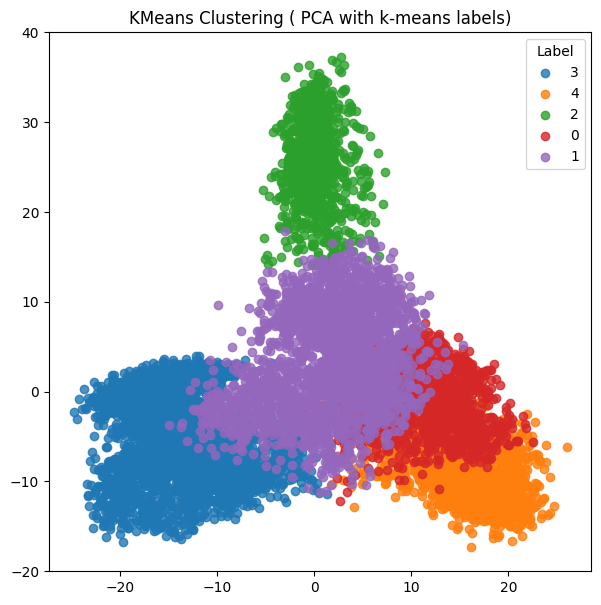

In [ ]:
# Kmeans plot
plt.figure(figsize=(7,7))
labels_kmeans= pd.Series(labels_kmeans)
labels_unique_kmeans=labels_kmeans.unique()
colors=sns.color_palette(None, len(labels_unique_kmeans))
for color, label in zip(colors,labels_unique_kmeans):
  plt.scatter(pca[label==labels_kmeans,0],pca[label==labels_kmeans,1],color=color, alpha=0.8, lw=1, label=label)
  plt.legend(title='Label', loc='upper right',scatterpoints=1)

plt.title('KMeans Clustering ( PCA with k-means labels)')
plt.show()

It can be observed that 5 different clusters are properly formed which corresponds to the 5 labels in our FashionMNIST datset. This suggests that the features extracted from the model are sufficiently discriminative to form distinct clusters in the PCA space. 

**DBSCAN clustering: (Density-Based Spatial Clustering of Applications with Noise)**

It involves automatically discovering natural grouping in data. Unlike supervised learning (like predictive modeling),
clustering algorithms only interpret the input data and find natural groups or clusters in feature space. The following is an array of predicted dbscan labels.


In [ ]:
# DBSCAN 
dbscan = DBSCAN(eps=0.5, min_samples=6)
labels_dbscan=dbscan.fit_predict(encoded)
display(labels_dbscan)

array([-1, -1, -1, ..., -1, -1, -1])

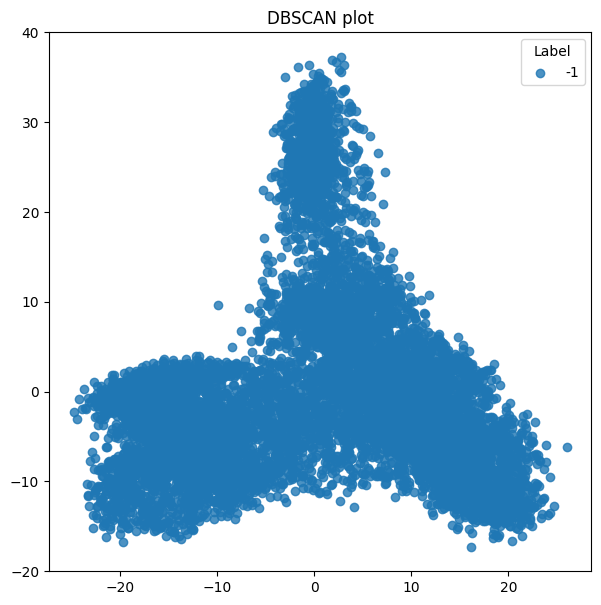

In [ ]:
# DBSCAN plot
plt.figure(figsize=(7,7))
labels_dbscan= pd.Series(labels_dbscan)
labels_unique_dbscan=labels_dbscan.unique()
colors=sns.color_palette(None, len(labels_unique_dbscan))
for color, label in zip(colors,labels_unique_dbscan):
  plt.scatter(pca[label==labels_dbscan,0],pca[label==labels_dbscan,1],color=color, alpha=0.8, lw=1, label=label)
  plt.legend(title='Label', loc='upper right',scatterpoints=1)

plt.title('DBSCAN plot')
plt.show()

In the current implementation of the DBSCAN algorithm with a given value of epsilon and minimum number of samples, all data points are being classified as noise. This could be because the value of epsilon is too small, causing the algorithm to be too strict in its clustering, or because the minimum number of samples required for a cluster is too high.

To improve the performance of the DBSCAN algorithm, we need to optimize the values of epsilon and minimum samples. This can be achieved by experimenting with different values of these parameters and evaluating the resulting cluster quality. Once we have identified the optimal values of these parameters, we can retrain our DBSCAN model and expect to see better clustering results.

For epsilon, use K-distance graph. For plotting a K-distance Graph. We need the distance between a point and its nearest data point for all data points in the dataset. We obtain this using NearestNeighbors from sklearn.neighbors.


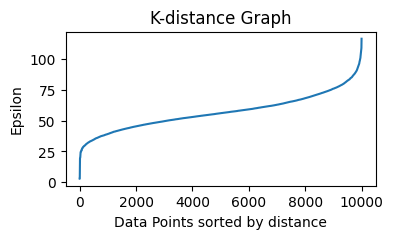

In [ ]:
from sklearn.neighbors import NearestNeighbors 
nearest_neighbours = NearestNeighbors(n_neighbors=2) 
nbrs = nearest_neighbours.fit(encoded)
distances, indices = nbrs.kneighbors(encoded)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(4,2))
plt.plot(distances)
plt.title('K-distance Graph') 
plt.xlabel('Data Points sorted by distance') 
plt.ylabel('Epsilon')
plt.show()

From the above graph, it can be observed that the maximum curvature is at epsilon=50. Therefore, retraining dbscan with epsilon=50, we get the PCA plot with DBSCAN labels as follows:-

array([-1, -1,  0, ..., -1,  0, -1])

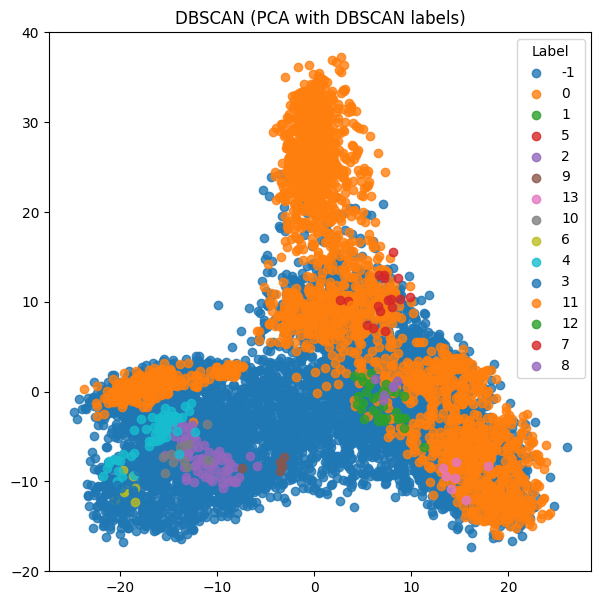

In [ ]:
# DBSCAN 
dbscan = DBSCAN(eps=50, min_samples=6)
labels_dbscan=dbscan.fit_predict(encoded)
display(labels_dbscan)

# DBSCAN plot
plt.figure(figsize=(7,7))
labels_dbscan= pd.Series(labels_dbscan)
labels_unique_dbscan=labels_dbscan.unique()
colors=sns.color_palette(None, len(labels_unique_dbscan))
for color, label in zip(colors,labels_unique_dbscan):
  plt.scatter(pca[label==labels_dbscan,0],pca[label==labels_dbscan,1],color=color, alpha=0.8, lw=1, label=label)
  plt.legend(title='Label', loc='upper right',scatterpoints=1)

plt.title('DBSCAN (PCA with DBSCAN labels)')
plt.show()

The above plot consists of different DBSCAN labels along with some noise. This suggests that DBSCAN may not be completely successful in separating the different groups in your data and Hence, K-Means clustering performs better than DBSCAN. 

### t-SNE 
---
t-SNE is a non-linear dimensionality reduction technique that aims to preserve the local structure of the data when projecting it onto a lower-dimensional space. 

In [ ]:
#t-sne
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2, random_state=12)
tsne=tsne.fit_transform(encoded)

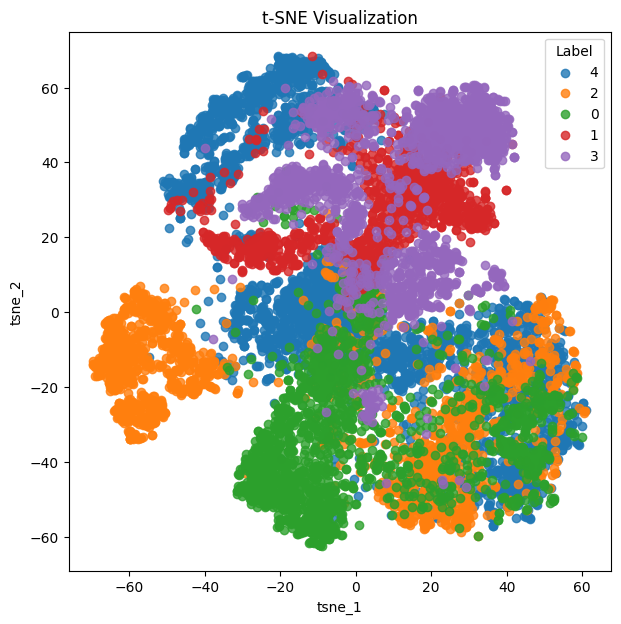

In [ ]:
#plot
plt.figure(figsize=(7,7))
labels_tsne=y_test['0'].unique()
colors=sns.color_palette(None, len(labels_tsne))
for color, label in zip(colors,labels_tsne):
  plt.scatter(tsne[label==y_test['0'],0],tsne[label==y_test['0'],1],color=color, alpha=0.8, lw=1, label=label)
  plt.legend(title='Label', loc='upper right',scatterpoints=1)

plt.title('t-SNE Visualization')
plt.xlabel('tsne_1')
plt.ylabel('tsne_2')
plt.show()

The above plot shows the visualization of higher dimensional data using t-SNE. High-dimensional data often contains a lot of noise, which contributes to overlapping of labels in t-SNE plot. But the effect of overlapping is less in t-SNE as compared to PCA because it retains the original form of the data.

### t-SNE plot with K-means clustering:

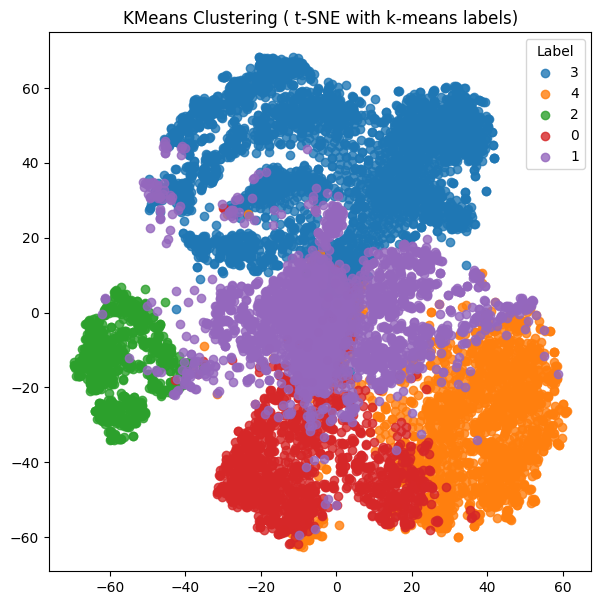

In [ ]:
# tsne with Kmeans labels
plt.figure(figsize=(7,7))
colors=sns.color_palette(None, len(labels_unique_kmeans))
for color, label in zip(colors,labels_unique_kmeans):
  plt.scatter(tsne[label==labels_kmeans,0],tsne[label==labels_kmeans,1],color=color, alpha=0.8, lw=1, label=label)
  plt.legend(title='Label', loc='upper right',scatterpoints=1)

plt.title('KMeans Clustering ( t-SNE with k-means labels)')
plt.show()

From the above plot, it can be seen that different distinct clusters of 5 classes are formed clearly. This shows that k-means has been succesful in classifying and clusturing in the t-SNE space. 

### DBSCAN with t-SNE :-

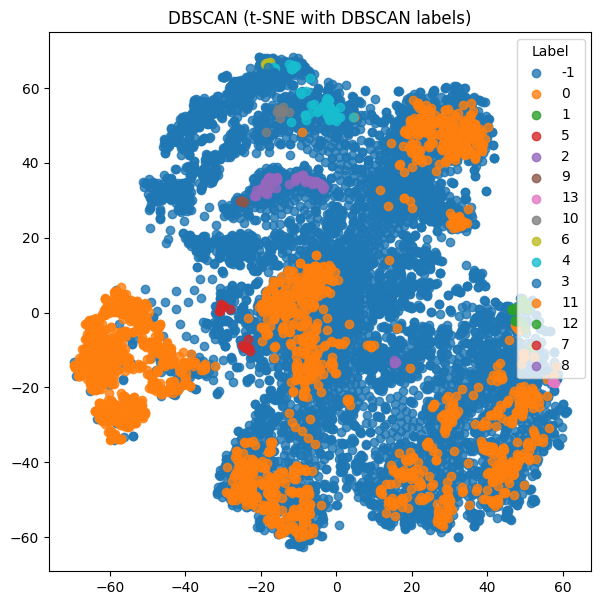

In [ ]:
# t-SNE visualization with DBSCAN labels
plt.figure(figsize=(7,7))
colors=sns.color_palette(None, len(labels_unique_dbscan))
for color, label in zip(colors,labels_unique_dbscan):
  plt.scatter(tsne[label==labels_dbscan,0],tsne[label==labels_dbscan,1],color=color, alpha=0.8, lw=1, label=label)
  plt.legend(title='Label', loc='upper right',scatterpoints=1)

plt.title('DBSCAN (t-SNE with DBSCAN labels)')
plt.show()

From the above plot, it is clear that the classes are overlapping with each other. Hence, we conclude that there is better separation of data with K-means than DBSCAN in both the cases.

### Based on the results of clustering and t-SNE can you guess what are the labels for the given dataset.

We will create new lists of label 0, 1 ,2 ,3 ,4 according to the k-means labels as it is clear from the above analysis that k-means clustering proved to best separate the different categories. 
Next, we will plot 10 images of these categories randomly to see what the labels actually represent. 

class label 0


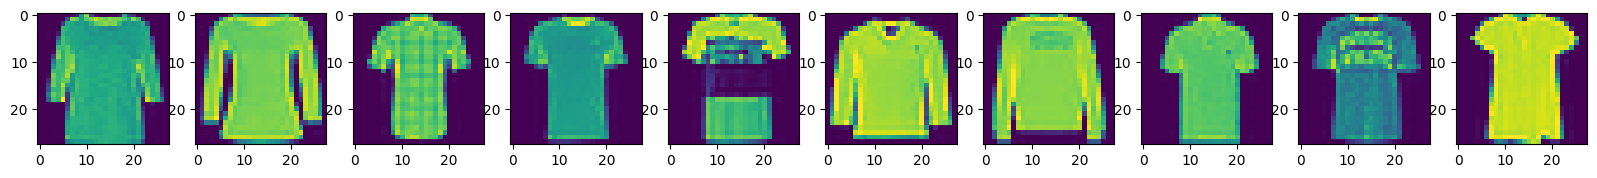

class label 1


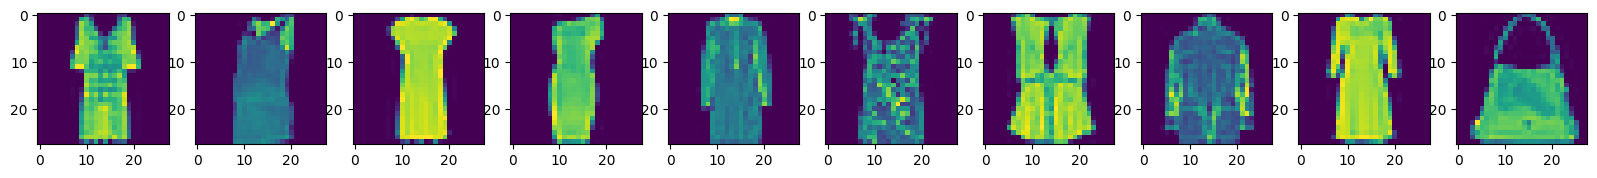

class label 2


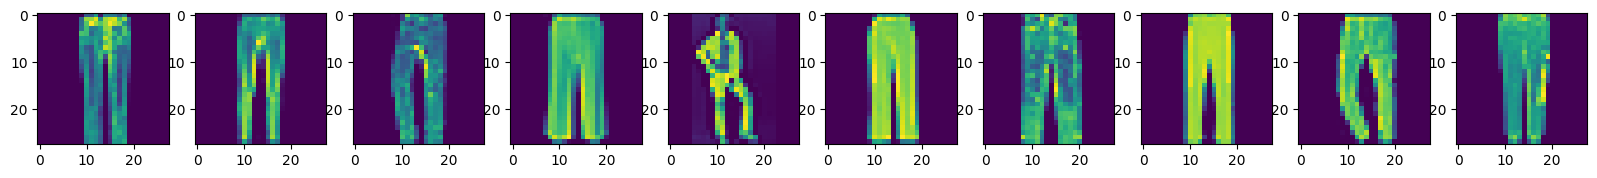

class label 3


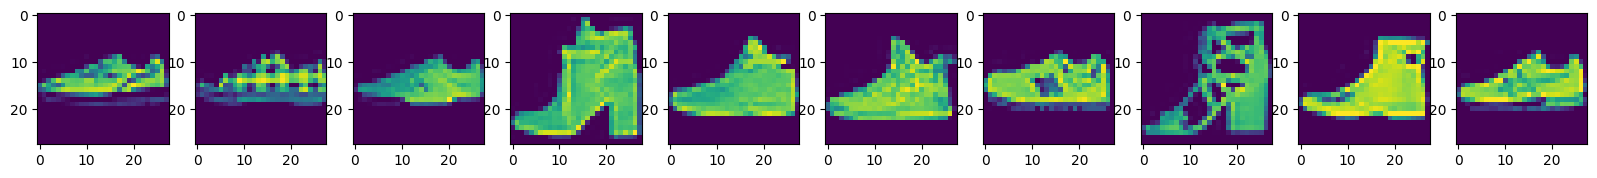

class label 4


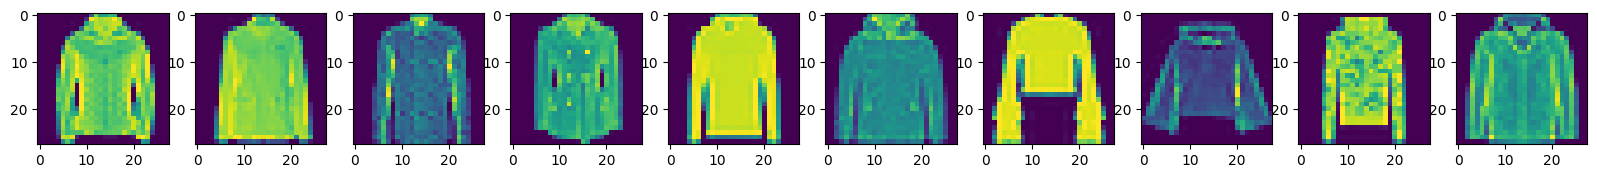

In [ ]:
x_test_0= x_test[labels_kmeans==0]
x_test_1= x_test[labels_kmeans==1]
x_test_2= x_test[labels_kmeans==2]
x_test_3= x_test[labels_kmeans==3]
x_test_4= x_test[labels_kmeans==4]

label_set=[x_test_0,x_test_1,x_test_2,x_test_3,x_test_4]
labels=[0,1,2,3,4]

for val, class_label in zip(label_set, labels):
  print('class label '+str(class_label))
  f, axarr= plt.subplots(1,10,figsize=(20,20))
  for j in range (0,10):
    index= random.randint(0,len(val))
    imgtest=val[index].reshape((28,28))
    axarr[j].imshow(imgtest)
  plt.show()

From the above analysis, we can see that the kmeans clustering and our encoded model has successfully classified the similar items and grouped them together. There can be some noise during classification. For eg, In label 1, there is a bag for the dress/one-piece. 

The above images shows that the mystery labels are as follows:-



Label|  Category| 
-----|----------|
0| t-shirts/tops|
1| Dress/one-piece|
2| bottom wear/trousers|
3| footwear |
4| Jackets/full-sleeve shirts|

Note that these label names can be different from the original dataset. 

### Feel free to try some other approach to using this encoding in a creative way.

### **LDA**

---

In this part, we will implement LDA feature reduction technique. LDA is a supervised learning technique that takes into account the class labels or categorical information in the data. The goal of LDA is to find a linear combination of the features that best separates the classes.

In [ ]:
#lda
lda=LinearDiscriminantAnalysis(n_components=2)
lda=lda.fit_transform(encoded[:6000],y_test[:6000].values.ravel())

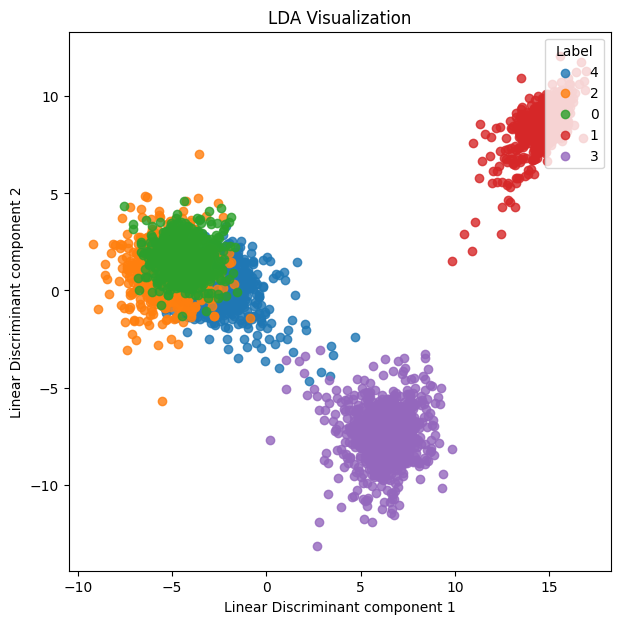

In [ ]:
#plot
plt.figure(figsize=(7,7))
labels_lda=y_test['0'].unique()
colors=sns.color_palette(None, len(labels_lda))
for color, label in zip(colors,labels_lda):
  plt.scatter(lda[label==y_test[:6000]['0'],0],lda[label==y_test[:6000]['0'],1],color=color, alpha=0.8, lw=1, label=label)
  plt.legend(title='Label', loc='upper right',scatterpoints=1)

plt.title('LDA Visualization')
plt.xlabel('Linear Discriminant component 1')
plt.ylabel('Linear Discriminant component 2')
plt.show()

It can be observed that the LDA technique has increased the distance between the classes especially between label 1 and 3 however, there is an overlap between the label 0,2 and 4. 

### References:-
[1] https://towardsdatascience.com/batch-normalisation-in-deep-neural-networkce65dd9e8dbf#:~:text=Batch%20normalization%20solves%20a%20major,you%20can%20often%20remove%20dropout

[2]https://keras.io/api/layers/pooling_layers/max_pooling2d/#:~:text=MaxPooling2D%20class&text=Max%20pooling%20oper

[3] https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/

[4] https://www.geeksforgeeks.org/intuition-of-adam-optimizer/

[5] https://ruder.io/optimizing-gradient-descent/

[6] https://medium.com/mlearning-aioptimizers-in-deep-learning-7bf81fed78a0

[7] https://towardsdatascience.com/understanding-rmsprop-faster-neural-network-learning-62e116fcf29a

[8] https://en.wikipedia.org/wiki/DBSCAN

[9] https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/

[10] https://en.wikipedia.org/wiki/K-means_clustering

[11] https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/ 

[12] https://towardsdatascience.com/latent-dirichlet-allocation-lda-9d1cd064ffa2
